# Import Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind

url = 'https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv'
df = pd.read_csv(url)


In [ ]:
# Get a list of all column headers
headers = list(df.columns)
print(headers)

['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_', 'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch', 'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury', 'SearchReason_AssistEscape', 'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId']


# Research Question 1

## Visualizations

In [ ]:
!pip install ydata-profiling

#EDA using pandas-profiling
from ydata_profiling import ProfileReport

# Produce and save the profiling report
profile = ProfileReport(df,title="Arrests and Strip Searches EDA Report")
profile.to_file("report.html")
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 20.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=c7cae2ab9d5bc688a9ac469cb5df3df1016585a7728e71d0a41f7cad2403c672
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Unin

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prof

In [ ]:
import plotly.express as px
#visualize as bar graph by sex by month for Strip search
fig1 = px.histogram(df, x="Arrest_Month", y="StripSearch", title="Male vs. Female Strip Search across All Month",
             color='Sex', barmode='group',
             height=400)
fig1.update_xaxes(categoryorder='array', categoryarray= ['Jan-Mar', 'Apr-June', 'July-Sept', 'Oct-Dec'])
fig1.show()

In [ ]:
df1 = df[["Arrest_Year", 
          "Sex", 
          "StripSearch"]]

df1 = df1.groupby(['Sex', 'StripSearch']).agg({'StripSearch': ['sum','count']})
df1.head(20)

StripSearch       
                        sum  count
Sex StripSearch                   
F   0                     0  11334
    1                  1283   1283
M   0                     0  46132
    1                  6518   6518
U   0                     0      9

In [ ]:
import plotly.express as px
fig2 = px.histogram(df, x="Arrest_Month", y="ArrestID", title="Female Vs Male Arrest Over Month",
             color='Sex', barmode='group', histfunc = "count",
             height=400)
fig2.update_layout(
    xaxis_title_text='Arrest Month', # xaxis label
    yaxis_title_text='Arrest Count', # yaxis label
)
fig2.update_xaxes(categoryorder='array', categoryarray= ['Jan-Mar', 'Apr-June', 'July-Sept', 'Oct-Dec'])
fig2.show()

In [ ]:
df2 = df[["ArrestID", 
          "Sex", 
          "StripSearch"]]

df2 = df2.groupby(['Sex', 'StripSearch']).agg({'StripSearch': ['sum','count']})
df2.head(20)

StripSearch       
                        sum  count
Sex StripSearch                   
F   0                     0  11334
    1                  1283   1283
M   0                     0  46132
    1                  6518   6518
U   0                     0      9

In [ ]:
from plotly import graph_objects as go

fig3 = go.Figure()

fig3.add_trace(go.Funnel(
    name = 'Male',
    y = ["Total Arrest", "Total Strip Search"],
    x = [52650, 6518],
    textinfo = "value+percent initial"))

fig3.add_trace(go.Funnel(
    name = 'Female',
    orientation = "h",
    y = ["Total Arrest", "Total Strip Search"],
    x = [12617, 1283],
    textposition = "inside",
    textinfo = "value+percent previous"))

# set the title of the chart
fig3.update_layout(title="Female vs. Male total arrest with Total Strip Search")

fig3.show()

In [ ]:
df3 = df.groupby(['Sex']).agg({'ArrestID': ['count']})
df3.head(20)

ArrestID
       count
Sex         
F      12542
M      52256
U          9

## T-test

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

#Create df4 for Jan-Mar
df4 = df[df["Arrest_Month"].str.contains("Jan-Mar")][["Arrest_Month", "Sex", "StripSearch"]]

#t-test1 for RQ1
# Split data into two groups
group1 = df4.loc[df["Sex"] == "F", "StripSearch"]
group2 = df4.loc[df["Sex"] == "M", "StripSearch"]

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)

# Print results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject null hypothesis: There is not enough evidence to conclude that the means of the two groups are different.")


t-statistic: -3.194352686331835
p-value: 0.0014039157660482504
Reject null hypothesis: The means of the two groups are significantly different.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

#Create df4 for Apr-June
df5 = df[df["Arrest_Month"].str.contains("Apr-June")][["Arrest_Month", "Sex", "StripSearch"]]

#t-test1 for RQ1
# Split data into two groups
group1 = df5.loc[df["Sex"] == "F", "StripSearch"]
group2 = df5.loc[df["Sex"] == "M", "StripSearch"]

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)

# Print results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject null hypothesis: There is not enough evidence to conclude that the means of the two groups are different.")

t-statistic: -5.764445755134285
p-value: 8.351787360000213e-09
Reject null hypothesis: The means of the two groups are significantly different.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

#Create df4 for July-Sept
df6 = df[df["Arrest_Month"].str.contains("July-Sept")][["Arrest_Month", "Sex", "StripSearch"]]

#t-test1 for RQ1
# Split data into two groups
group1 = df6.loc[df["Sex"] == "F", "StripSearch"]
group2 = df6.loc[df["Sex"] == "M", "StripSearch"]

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)

# Print results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject null hypothesis: There is not enough evidence to conclude that the means of the two groups are different.")

t-statistic: -4.5804355197644275
p-value: 4.6734838605815446e-06
Reject null hypothesis: The means of the two groups are significantly different.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

#Create df4 for Oct-Dec
df7 = df[df["Arrest_Month"].str.contains("Oct-Dec")][["Arrest_Month", "Sex", "StripSearch"]]

#t-test1 for RQ1
# Split data into two groups
group1 = df7.loc[df["Sex"] == "F", "StripSearch"]
group2 = df7.loc[df["Sex"] == "M", "StripSearch"]

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)

# Print results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject null hypothesis: There is not enough evidence to conclude that the means of the two groups are different.")

t-statistic: -0.6403933061883674
p-value: 0.5219262800514645
Fail to reject null hypothesis: There is not enough evidence to conclude that the means of the two groups are different.


## ANOVA & Tukey's HDS

In [ ]:
import pandas as pd
import statsmodels.stats.multicomp as mc
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# create df to remove all data for Sex = U
df8 = df[df["Arrest_Month"].str.contains("M", "F")][["Arrest_Month", "Sex", "StripSearch"]]


# Fit a one-way ANOVA model
model = ols('StripSearch ~ Sex', data=df8).fit()
anova_results = anova_lm(model)

# Perform Tukey's HSD test
posthoc = mc.MultiComparison(df8[['StripSearch']], df8['Sex'])
tukey_results = posthoc.tukeyhsd()

# Print the ANOVA results and Tukey's HSD results
print(anova_results)


               df       sum_sq   mean_sq          F    PR(>F)
Sex           1.0     1.434810  1.434810  10.203889  0.001404
Residual  17611.0  2476.353755  0.140614        NaN       NaN


In [ ]:
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     F      M   0.0222 0.0014 0.0086 0.0359   True
--------------------------------------------------


# Research Question 2

## Data Preprocessing

In [ ]:
# Check which attribute has null value
print(df.isnull().sum())

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [ ]:
# Drop records with null age group since there are only a few null age group records
df = df.dropna(subset=['Age_group__at_arrest_'])

In [ ]:
# Show the total number of records
print(df.shape[0])

65252


In [ ]:
# Create a column 'Age' and combine values with the same meaning
df['Age'] = np.where(df['Age_group__at_arrest_'] == 'Aged 17 years and under', '17 and younger',
         np.where(df['Age_group__at_arrest_'] == 'Aged 17 years and younger', '17 and younger',
         np.where(df['Age_group__at_arrest_'] == 'Aged 18 to 24 years', '18 - 24',
         np.where(df['Age_group__at_arrest_'] == 'Aged 25 to 34 years', '25 - 34',
         np.where(df['Age_group__at_arrest_'] == 'Aged 35 to 44 years', '35 - 44',
         np.where(df['Age_group__at_arrest_'] == 'Aged 45 to 54 years', '45 - 54',
         np.where(df['Age_group__at_arrest_'] == 'Aged 55 to 64 years', '55 - 64',
         np.where(df['Age_group__at_arrest_'] == 'Aged 65 and older', '65 and older',
         np.where(df['Age_group__at_arrest_'] == 'Aged 65 years and older', '65 and older','')))))))))

<ipython-input-65-d19c475aaf6f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Create a column 'Youth' and combine values with the same meaning
df['Youth'] = np.where(df['Youth_at_arrest__under_18_years'] == 'Not a youth', 'Not a youth',
         np.where(df['Youth_at_arrest__under_18_years'] == 'Youth (aged 17 and younger)', 'Youth',
         np.where(df['Youth_at_arrest__under_18_years'] == 'Youth (aged 17 years and under)', 'Youth', '')))

<ipython-input-66-6eee497c2976>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Check the dataset
df.head()

Arrest_Year Arrest_Month  EventID   ArrestID  PersonID     Perceived_Race  \
0         2020    July-Sept  1005907  6017884.0    326622              White   
1         2020    July-Sept  1014562  6056669.0    326622              White   
2         2020      Oct-Dec  1029922  6057065.0    326622  Unknown or Legacy   
3         2021      Jan-Mar  1052190  6029059.0    327535              Black   
4         2021      Jan-Mar  1015512  6040372.0    327535        South Asian   

  Sex Age_group__at_arrest_ Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
0   M   Aged 35 to 44 years                     Not a youth           54  ...   
1   M   Aged 35 to 44 years                     Not a youth           54  ...   
2   M   Aged 35 to 44 years                     Not a youth           54  ...   
3   M   Aged 25 to 34 years                     Not a youth           XX  ...   
4   M   Aged 25 to 34 years                     Not a youth           XX  ...   

   Actions_at_arrest___Assaulted_o  Actions_at_arrest___Cooperative  \
0                                0                                1   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

  SearchReason_CauseInjury  SearchReason_AssistEscape  \
0                      NaN                        NaN   
1                      NaN                        NaN   
2                      NaN                        NaN   
3                      NaN                        NaN   
4                      NaN                        NaN   

   SearchReason_PossessWeapons  SearchReason_PossessEvidence  ItemsFound  \
0                          NaN                           NaN         NaN   
1                          NaN                           NaN         NaN   
2                          NaN                           NaN         NaN   
3                          NaN                           NaN         NaN   
4                          NaN                           NaN         NaN   

   ObjectId      Age        Youth  
0         1  35 - 44  Not a youth  
1         2  35 - 44  Not a youth  
2         3  35 - 44  Not a youth  
3         4  25 - 34  Not a youth  
4         5  25 - 34  Not a youth  

[5 rows x 27 columns]

## Visualizations

Booked VS Youth

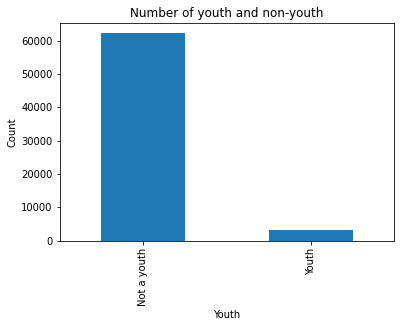

In [ ]:
df['Youth'].value_counts().plot(kind='bar')

plt.title('Number of youth and non-youth')
plt.xlabel('Youth')
plt.ylabel('Count')

plt.show()

In [ ]:
table1 = pd.crosstab(df['Booked'], df['Youth'])

In [ ]:
print(table1)

Youth   Not a youth  Youth
Booked                    
0             29533   1814
1             32677   1228


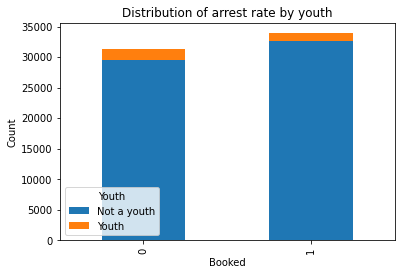

In [ ]:
plot1 = table1.plot(kind='bar', stacked=True)
plot1.set_title('Distribution of arrest rate by youth')
plot1.set_ylabel('Count')
plt.show()

In [ ]:
table2 = pd.crosstab(df['Youth'], df['Booked']).apply(lambda r: r/r.sum() * 100, axis=1)

In [ ]:
print(table2)

Booked               0          1
Youth                            
Not a youth  47.473075  52.526925
Youth        59.631821  40.368179


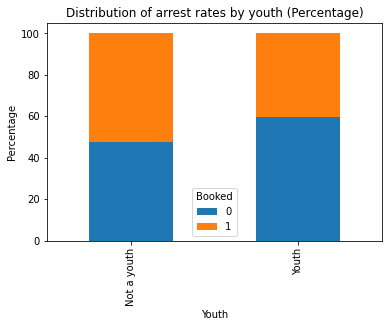

In [ ]:
plot2 = table2.plot(kind='bar', stacked=True)
plot2.set_title('Distribution of arrest rates by youth (Percentage)')
plot2.set_ylabel('Percentage')
plt.show()

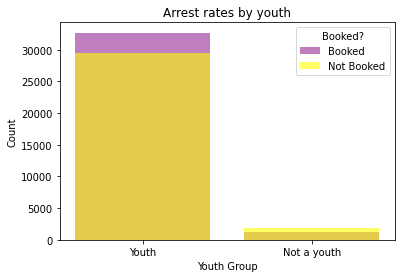

In [ ]:
fig, ax = plt.subplots()

youth_group = ['Youth', 'Not a youth']

booked_count2 = df[df['Booked'] == 1]['Youth'].value_counts().sort_index()
not_booked_count2 = df[df['Booked'] == 0]['Youth'].value_counts().sort_index()

ax.bar(youth_group, booked_count2, alpha=0.5, color='purple', label='Booked')
ax.bar(youth_group, not_booked_count2, alpha=0.6, color='yellow', label='Not Booked')

ax.set_xlabel('Youth Group')
ax.set_ylabel('Count')
ax.set_title('Arrest rates by youth')

ax.legend(title='Booked?')

Booked VS Age

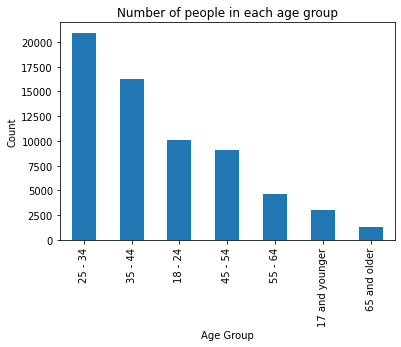

In [ ]:
df['Age'].value_counts().plot(kind='bar')

plt.title('Number of people in each age group')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.show()

In [ ]:
table3 = pd.crosstab(df['Age'], df['Booked'])

In [ ]:
print(table3)

Booked             0      1
Age                        
17 and younger  1814   1228
18 - 24         4807   5234
25 - 34         9480  11469
35 - 44         7512   8730
45 - 54         4422   4644
55 - 64         2485   2105
65 and older     827    495


<AxesSubplot:xlabel='Age'>

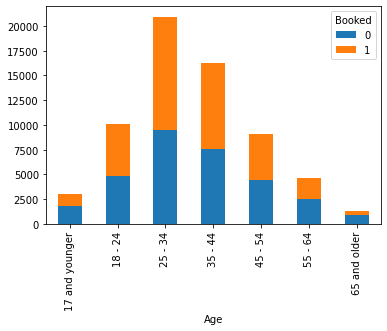

In [ ]:
table3.plot(kind='bar', stacked=True)

In [ ]:
table4 = pd.crosstab(df['Age'], df['Booked']).apply(lambda r: r/r.sum() * 100, axis=1)

In [ ]:
print(table4)

Booked                  0          1
Age                                 
17 and younger  59.631821  40.368179
18 - 24         47.873718  52.126282
25 - 34         45.252757  54.747243
35 - 44         46.250462  53.749538
45 - 54         48.775645  51.224355
55 - 64         54.139434  45.860566
65 and older    62.556732  37.443268


<AxesSubplot:xlabel='Age'>

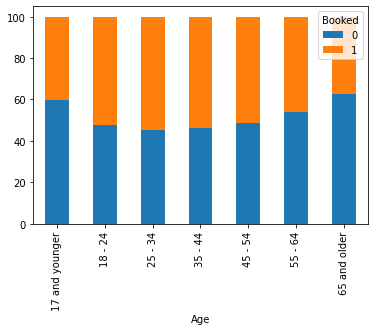

In [ ]:
table4.plot(kind='bar', stacked=True)

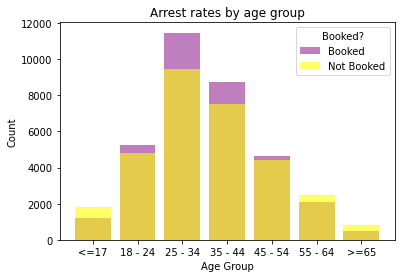

In [ ]:
fig, ax = plt.subplots()

age_group = ['<=17', '18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '>=65']

booked_count = df[df['Booked'] == 1]['Age'].value_counts().sort_index()
not_booked_count = df[df['Booked'] == 0]['Age'].value_counts().sort_index()

ax.bar(age_group, booked_count, alpha=0.5, color='purple', label='Booked')
ax.bar(age_group, not_booked_count, alpha=0.6, color='yellow', label='Not Booked')

ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Arrest rates by age group')

ax.legend(title='Booked?')

## T-test

In [ ]:
group_youth = df.loc[df['Youth'] == 'Youth', 'Booked']
group_notyouth = df.loc[df['Youth'] == 'Not a youth', 'Booked']

In [ ]:
t_statistic, p_value = ttest_ind(group_youth, group_notyouth, equal_var=False)

In [ ]:
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -13.33250828223915
p-value: 1.492891175480631e-39


In [ ]:
group_2534 = df.loc[df['Age'] == '25 - 34', 'Booked']
group_3544 = df.loc[df['Age'] == '35 - 44', 'Booked']

In [ ]:
t_statistic, p_value = ttest_ind(group_2534, group_3544, equal_var=False)

In [ ]:
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 1.9153617697970984
p-value: 0.05545454952532147


In [ ]:
group_2534 = df.loc[df['Age'] == '25 - 34', 'Booked']
group_65 = df.loc[df['Age'] == '65 and older', 'Booked']

In [ ]:
t_statistic, p_value = ttest_ind(group_2534, group_65, equal_var=False)

In [ ]:
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 12.582080069704146
p-value: 1.3732423394937862e-34


## One-way ANOVA & Tukey's HSD

One-Way ANOVA: Booked VS Age

In [ ]:
# Dependent varibale: 'Booked'; Independent varibale: 'Age'
model2 = ols('Booked ~ Age', df).fit()

In [ ]:
# One-way ANOVA test
anova_result2 = sm.stats.anova_lm(model2, typ=2)

In [ ]:
# Show the test result
print(anova_result2)

                sum_sq       df          F        PR(>F)
Age         107.805412      6.0  72.452717  1.937452e-90
Residual  16180.124996  65245.0        NaN           NaN


In [ ]:
# Tukey's HSD test
tukey_result2 = pairwise_tukeyhsd(endog=df['Booked'], groups=df['Age'], alpha=0.05)

In [ ]:
# Show the test result
print(tukey_result2)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
17 and younger      18 - 24   0.1176  0.001  0.0872   0.148   True
17 and younger      25 - 34   0.1438  0.001  0.1153  0.1723   True
17 and younger      35 - 44   0.1338  0.001  0.1048  0.1628   True
17 and younger      45 - 54   0.1086  0.001  0.0778  0.1393   True
17 and younger      55 - 64   0.0549  0.001  0.0206  0.0893   True
17 and younger 65 and older  -0.0292 0.5511 -0.0776  0.0191  False
       18 - 24      25 - 34   0.0262  0.001  0.0084   0.044   True
       18 - 24      35 - 44   0.0162 0.1356 -0.0024  0.0349  False
       18 - 24      45 - 54   -0.009 0.8644 -0.0303  0.0123  False
       18 - 24      55 - 64  -0.0627  0.001 -0.0888 -0.0365   True
       18 - 24 65 and older  -0.1468  0.001 -0.1898 -0.1039   True
       25 - 34      35 - 44    -0.01 0.4708 -0.0253  0.0054  F

One-Way ANOVA: Booked VS Youth

In [ ]:
# Dependent varibale: 'Booked'; Independent varibale: 'Youth'
model3 = ols('Booked ~ Youth', df).fit()

In [ ]:
# One-way ANOVA test
anova_result3 = sm.stats.anova_lm(model3, typ=2)

In [ ]:
# Show the test result
print(anova_result3)

                sum_sq       df           F        PR(>F)
Youth        42.874904      1.0  172.211631  2.728815e-39
Residual  16245.055504  65250.0         NaN           NaN


In [ ]:
# Tukey's HSD test
tukey_result3 = pairwise_tukeyhsd(df['Booked'], df['Youth'], 0.05)

In [ ]:
# Show the test result
print(tukey_result3)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1   group2 meandiff p-adj  lower   upper  reject
--------------------------------------------------------
Not a youth  Youth  -0.1216 0.001 -0.1397 -0.1034   True
--------------------------------------------------------


# Research Question 3

## Data Preprocessing

In [ ]:
# Check which attribute has null value
print(df.isnull().sum())

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                  0
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57451
SearchReason_AssistEscape          57451
SearchReason_PossessWeapons        57451
SearchReason_PossessEvidence       57451
ItemsFound                         57451
ObjectId        

In [ ]:
# Drop records with null race group since there are only a few null age group records
df = df.dropna(subset=['Perceived_Race'])

In [ ]:
# Show the total number of records
print(df.shape[0])

65248


In [ ]:
# Show the unique value of 'Perceived_Race'
print(df['Perceived_Race'].unique())

['White' 'Unknown or Legacy' 'Black' 'South Asian' 'Indigenous'
 'Middle-Eastern' 'Latino' 'East/Southeast Asian']


In [ ]:
# Create a new column for People Of Color
df['POC'] = np.where(df['Perceived_Race'] == 'White', 'No',
         np.where(df['Perceived_Race'] == 'Unknown or Legacy', 'Yes',
         np.where(df['Perceived_Race'] == 'Black', 'Yes',
         np.where(df['Perceived_Race'] == 'South Asian', 'Yes',
         np.where(df['Perceived_Race'] == 'Indigenous', 'Yes',
         np.where(df['Perceived_Race'] == 'Middle-Eastern', 'Yes',
         np.where(df['Perceived_Race'] == 'Latino', 'Yes',
         np.where(df['Perceived_Race'] == 'East/Southeast Asian', 'Yes',''))))))))

<ipython-input-107-b02e7d14af99>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Check the dataset
df.head()

Arrest_Year Arrest_Month  EventID   ArrestID  PersonID     Perceived_Race  \
0         2020    July-Sept  1005907  6017884.0    326622              White   
1         2020    July-Sept  1014562  6056669.0    326622              White   
2         2020      Oct-Dec  1029922  6057065.0    326622  Unknown or Legacy   
3         2021      Jan-Mar  1052190  6029059.0    327535              Black   
4         2021      Jan-Mar  1015512  6040372.0    327535        South Asian   

  Sex Age_group__at_arrest_ Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
0   M   Aged 35 to 44 years                     Not a youth           54  ...   
1   M   Aged 35 to 44 years                     Not a youth           54  ...   
2   M   Aged 35 to 44 years                     Not a youth           54  ...   
3   M   Aged 25 to 34 years                     Not a youth           XX  ...   
4   M   Aged 25 to 34 years                     Not a youth           XX  ...   

   Actions_at_arrest___Cooperative  SearchReason_CauseInjury  \
0                                1                       NaN   
1                                0                       NaN   
2                                0                       NaN   
3                                0                       NaN   
4                                0                       NaN   

  SearchReason_AssistEscape  SearchReason_PossessWeapons  \
0                       NaN                          NaN   
1                       NaN                          NaN   
2                       NaN                          NaN   
3                       NaN                          NaN   
4                       NaN                          NaN   

   SearchReason_PossessEvidence  ItemsFound  ObjectId      Age        Youth  \
0                           NaN         NaN         1  35 - 44  Not a youth   
1                           NaN         NaN         2  35 - 44  Not a youth   
2                           NaN         NaN         3  35 - 44  Not a youth   
3                           NaN         NaN         4  25 - 34  Not a youth   
4                           NaN         NaN         5  25 - 34  Not a youth   

   POC  
0   No  
1   No  
2  Yes  
3  Yes  
4  Yes  

[5 rows x 28 columns]

In [ ]:
# Check the current data type
print(df.dtypes)

Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

## Visualizations

StripSearch VS Race

In [ ]:
table5 = pd.crosstab(df['Perceived_Race'], df['StripSearch'])

In [ ]:
print(table5)

StripSearch               0     1
Perceived_Race                   
Black                 15084  2434
East/Southeast Asian   4071   341
Indigenous             1626   306
Latino                 1636   132
Middle-Eastern         3009   228
South Asian            3356   257
Unknown or Legacy      4519   536
White                 24147  3566


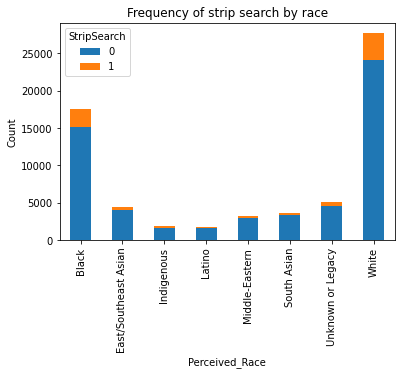

In [ ]:
plot5 = table5.plot(kind='bar', stacked=True)
plot5.set_title('Frequency of strip search by race')
plot5.set_ylabel('Count')
plt.show()

In [ ]:
table6 = pd.crosstab(df['Perceived_Race'], df['StripSearch']).apply(lambda r: r/r.sum() * 100, axis=1)

In [ ]:
print(table6)

StripSearch                   0          1
Perceived_Race                            
Black                 86.105720  13.894280
East/Southeast Asian  92.271079   7.728921
Indigenous            84.161491  15.838509
Latino                92.533937   7.466063
Middle-Eastern        92.956441   7.043559
South Asian           92.886798   7.113202
Unknown or Legacy     89.396637  10.603363
White                 87.132393  12.867607


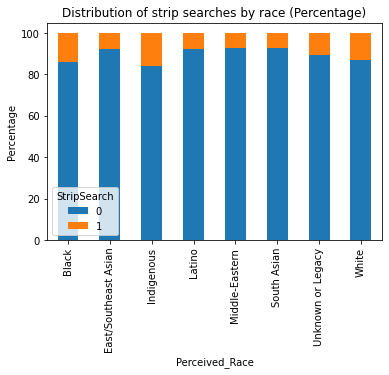

In [ ]:
plot6 = table6.plot(kind='bar', stacked=True)
plot6.set_title('Distribution of strip searches by race (Percentage)')
plot6.set_ylabel('Percentage')
plt.show()

In [ ]:
table7 = pd.crosstab(df['POC'], df['StripSearch'])

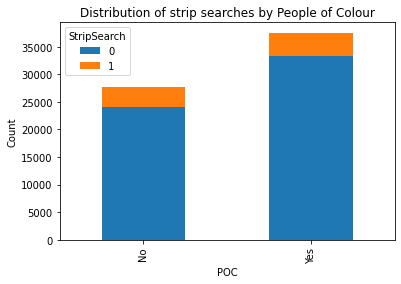

In [ ]:
plot7 = table7.plot(kind='bar', stacked=True)
plot7.set_title('Distribution of strip searches by People of Colour')
plot7.set_ylabel('Count')
plt.show()

StripSearch VS Age

In [ ]:
table8 = pd.crosstab(df['Age'], df['StripSearch'])

In [ ]:
print(table8)

StripSearch         0     1
Age                        
17 and younger   2762   280
18 - 24          8691  1349
25 - 34         18177  2771
35 - 44         14144  2097
45 - 54          8160   905
55 - 64          4228   362
65 and older     1286    36


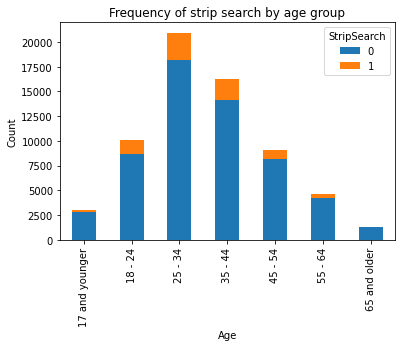

In [ ]:
plot8 = table8.plot(kind='bar', stacked=True)
plot8.set_title('Frequency of strip search by age group')
plot8.set_ylabel('Count')
plt.show()

In [ ]:
table9 = pd.crosstab(df['Age'], df['StripSearch']).apply(lambda r: r/r.sum() * 100, axis=1)

In [ ]:
print(table9)

StripSearch             0          1
Age                                 
17 and younger  90.795529   9.204471
18 - 24         86.563745  13.436255
25 - 34         86.772007  13.227993
35 - 44         87.088233  12.911767
45 - 54         90.016547   9.983453
55 - 64         92.113290   7.886710
65 and older    97.276853   2.723147


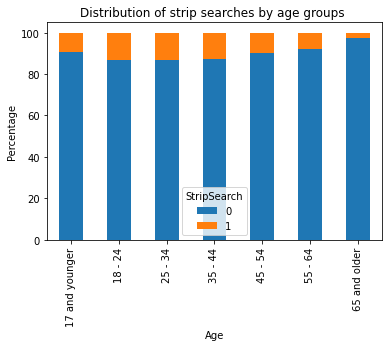

In [ ]:
plot9 = table9.plot(kind='bar', stacked=True)
plot9.set_title('Distribution of strip searches by age groups ')
plot9.set_ylabel('Percentage')
plt.show()

StripSearch VS Age & Race

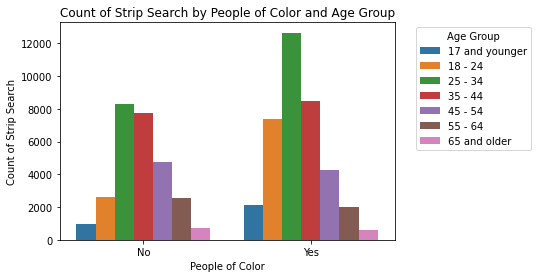

In [ ]:
group1 = df.groupby(['POC', 'Age'])['StripSearch'].count().reset_index()

# Create a bar plot using Seaborn
sns.barplot(x='POC', y='StripSearch', hue='Age', data=group1)

# Add labels and title
plt.xlabel('People of Color')
plt.ylabel('Count of Strip Search')
plt.title('Count of Strip Search by People of Color and Age Group')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

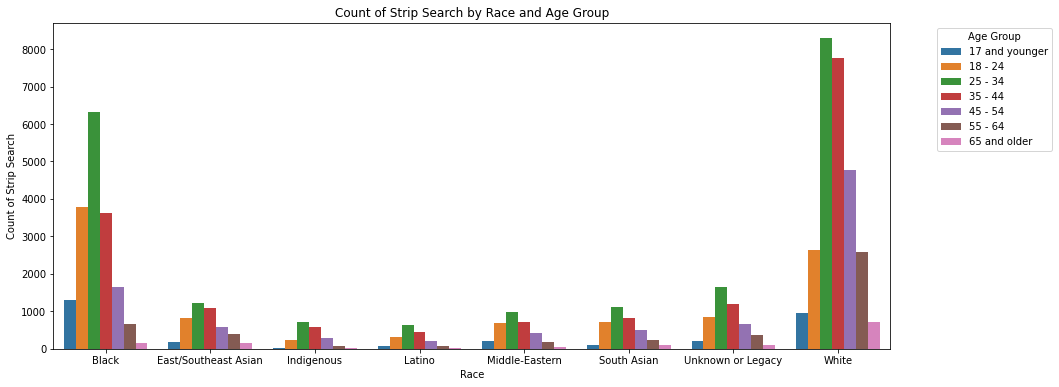

In [ ]:
group2 = df.groupby(['Perceived_Race', 'Age'])['StripSearch'].count().reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='Perceived_Race', y='StripSearch', hue='Age', data=group2, ax=ax)
plt.xlabel('Race')
plt.ylabel('Count of Strip Search')
plt.title('Count of Strip Search by Race and Age Group')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

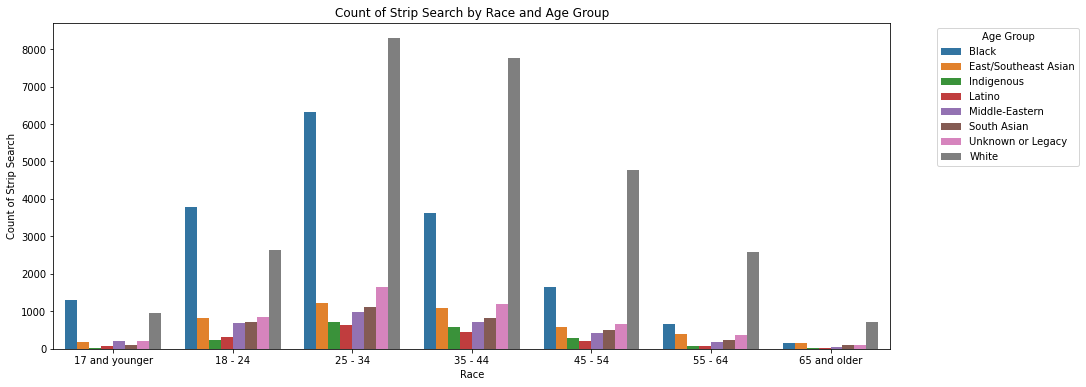

In [ ]:
group3 = df.groupby(['Age', 'Perceived_Race'])['StripSearch'].count().reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='Age', y='StripSearch', hue='Perceived_Race', data=group3, ax=ax)
plt.xlabel('Race')
plt.ylabel('Count of Strip Search')
plt.title('Count of Strip Search by Race and Age Group')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

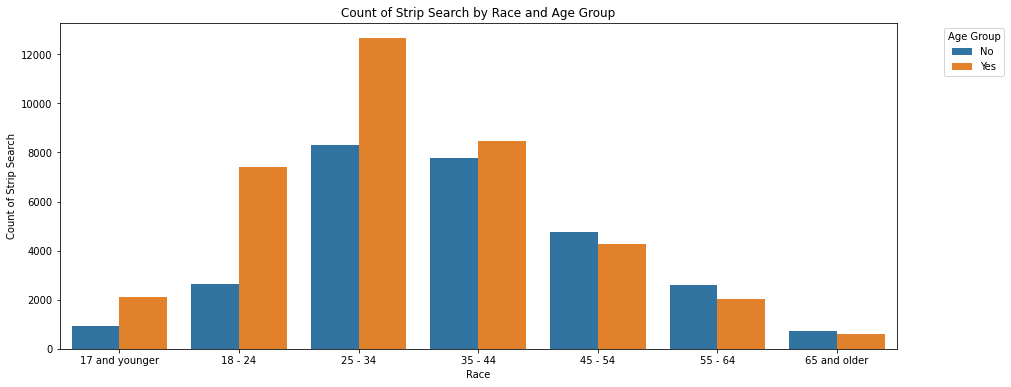

In [ ]:
group4 = df.groupby(['Age', 'POC'])['StripSearch'].count().reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='Age', y='StripSearch', hue='POC', data=group4, ax=ax)
plt.xlabel('Race')
plt.ylabel('Count of Strip Search')
plt.title('Count of Strip Search by Race and Age Group')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

## T-test

Strip Search & POC

In [ ]:
group_colored = df.loc[df['POC'] == 'Yes', 'StripSearch']
group_notcolored = df.loc[df['POC'] == 'No', 'StripSearch']

In [ ]:
t_statistic, p_value = ttest_ind(group_colored, group_notcolored, equal_var=False)

In [ ]:
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -6.1273703503908274
p-value: 8.991881959699512e-10


Strip Search & Black

In [ ]:
group_black = df.loc[df['Perceived_Race'] == 'Black', 'StripSearch']
group_white = df.loc[df['Perceived_Race'] == 'White', 'StripSearch']

In [ ]:
t_statistic, p_value = ttest_ind(group_black, group_white, equal_var=False)

In [ ]:
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 3.113181378896259
p-value: 0.0018522582147967232


Strip Search & Youth

In [ ]:
group_youth2 = df.loc[df['Youth'] == 'Youth', 'StripSearch']
group_notyouth2 = df.loc[df['Youth'] == 'Not a youth', 'StripSearch']

In [ ]:
t_statistic, p_value = ttest_ind(group_youth2, group_notyouth2, equal_var=False)

In [ ]:
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -5.338693868278733
p-value: 9.970229086491259e-08


Strip Search & Elderly

In [ ]:
group_elderly = df.loc[df['Age'] == '65 and older', 'StripSearch']
group_notelderly = df.loc[df['Age'] != '65 and older', 'StripSearch']

In [ ]:
t_statistic, p_value = ttest_ind(group_elderly, group_notelderly, equal_var=False)

In [ ]:
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -20.216171577489664
p-value: 7.582399768883804e-81


## Two-way ANOVA & Tukey's HSD

In [ ]:
model4 = ols('StripSearch ~ Perceived_Race * Age', data=df).fit()

In [ ]:
# Two-way ANOVA test
anova_result4 = sm.stats.anova_lm(model4, typ=2)

In [ ]:
# Show the test result
print(anova_result4)

                         sum_sq       df          F        PR(>F)
Perceived_Race        39.840514      7.0  54.690597  1.970197e-78
Age                   31.159430      6.0  49.902698  1.523262e-61
Perceived_Race:Age    11.589455     42.0   2.651548  3.477303e-08
Residual            6784.354527  65192.0        NaN           NaN


In [ ]:
# Tukey's HSD test
tukey_result4 = pairwise_tukeyhsd(endog=df['StripSearch'], groups=df['Perceived_Race'], alpha=0.05)

In [ ]:
# Show the test result
print(tukey_result4)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.0617  0.001 -0.0782 -0.0451   True
               Black           Indigenous   0.0194 0.1921 -0.0041  0.0429  False
               Black               Latino  -0.0643  0.001 -0.0887 -0.0398   True
               Black       Middle-Eastern  -0.0685  0.001 -0.0873 -0.0497   True
               Black          South Asian  -0.0678  0.001 -0.0857 -0.0499   True
               Black    Unknown or Legacy  -0.0329  0.001 -0.0486 -0.0173   True
               Black                White  -0.0103 0.0226 -0.0197 -0.0008   True
East/Southeast Asian           Indigenous   0.0811  0.001  0.0543  0.1078   True
East/Southeast Asian               Latino  -0.0026    0.9 -0.0302   0.025  False
East/Southeast Asian       M

In [ ]:
# Tukey's HSD test
tukey_result5 = pairwise_tukeyhsd(endog=df['StripSearch'], groups=df['Age'], alpha=0.05)

In [ ]:
# Show the test result
print(tukey_result5)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
17 and younger      18 - 24   0.0423  0.001  0.0226  0.0621   True
17 and younger      25 - 34   0.0402  0.001  0.0217  0.0588   True
17 and younger      35 - 44   0.0371  0.001  0.0182  0.0559   True
17 and younger      45 - 54   0.0078    0.9 -0.0122  0.0278  False
17 and younger      55 - 64  -0.0132 0.5756 -0.0355  0.0091  False
17 and younger 65 and older  -0.0648  0.001 -0.0963 -0.0334   True
       18 - 24      25 - 34  -0.0021    0.9 -0.0137  0.0095  False
       18 - 24      35 - 44  -0.0052  0.849 -0.0174  0.0069  False
       18 - 24      45 - 54  -0.0345  0.001 -0.0484 -0.0207   True
       18 - 24      55 - 64  -0.0555  0.001 -0.0725 -0.0385   True
       18 - 24 65 and older  -0.1071  0.001 -0.1351 -0.0792   True
       25 - 34      35 - 44  -0.0032    0.9 -0.0131  0.0068  F